<a href="https://colab.research.google.com/github/leoquiroa/LoanRisk/blob/master/SalesOverThreeYears.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# essentials
import numpy as np 
import pandas as pd 

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# time series algorithm
from fbprophet import Prophet
from fbprophet.diagnostics import performance_metrics

# reproducibility
np.random.seed(34)

# Jupyter magic
%reload_ext autoreload
%autoreload 2
%matplotlib inline

sns.set()

In [0]:
url = 'https://raw.githubusercontent.com/leoquiroa/Prophet/master/sales-of-shampoo-over-a-three-ye.csv'
df_shampoo_orig = pd.read_csv(url, 
                              nrows=36,
                              skiprows = 1, 
                              names = ['ds', 'y'], 
                              parse_dates = True )
df = df_shampoo_orig
df

,ds,y
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


Add prefix '198'

In [0]:
df['ds'] = df.ds.apply(lambda x: "198"+x)
df.ds.head()

0    1981-01
1    1981-02
2    1981-03
3    1981-04
4    1981-05
Name: ds, dtype: object

In [0]:
df.head()

,ds,y
0,1981-01,266.0
1,1981-02,145.9
2,1981-03,183.1
3,1981-04,119.3
4,1981-05,180.3


Add last day of the month

In [0]:
df['ds']=pd.to_datetime(df['ds'])+pd.tseries.offsets.MonthEnd(0)

In [0]:
df.head()

,ds,y
0,1981-01-31,266.0
1,1981-02-28,145.9
2,1981-03-31,183.1
3,1981-04-30,119.3
4,1981-05-31,180.3


Split train/test data 66%.
Train = 1981 and 1982.
Test = 1983.


In [0]:
train = df[:24]
train

,ds,y
0,1981-01-31,266.0
1,1981-02-28,145.9
2,1981-03-31,183.1
3,1981-04-30,119.3
4,1981-05-31,180.3
5,1981-06-30,168.5
6,1981-07-31,231.8
7,1981-08-31,224.5
8,1981-09-30,192.8
9,1981-10-31,122.9


In [0]:
test = df[24:]
test

,ds,y
24,1983-01-31,339.7
25,1983-02-28,440.4
26,1983-03-31,315.9
27,1983-04-30,439.3
28,1983-05-31,401.3
29,1983-06-30,437.4
30,1983-07-31,575.5
31,1983-08-31,407.6
32,1983-09-30,682.0
33,1983-10-31,475.3


## ORDER 5

In [0]:
m = Prophet(
    weekly_seasonality=False, 
    daily_seasonality=False, 
    n_changepoints=2)
m.add_seasonality(
    name='yearly', 
    period=12, 
    fourier_order=5)
m.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Found custom seasonality named "yearly", disabling built-in yearly seasonality.


In [0]:
future = m.make_future_dataframe(periods=12, freq='M')
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1981-01-31,208.757376,170.541303,246.025853
1,1981-02-28,137.660185,100.871899,177.664807
2,1981-03-31,195.288067,157.200300,237.901947
3,1981-04-30,128.287889,88.548232,168.446387
4,1981-05-31,231.320220,192.198564,272.065631


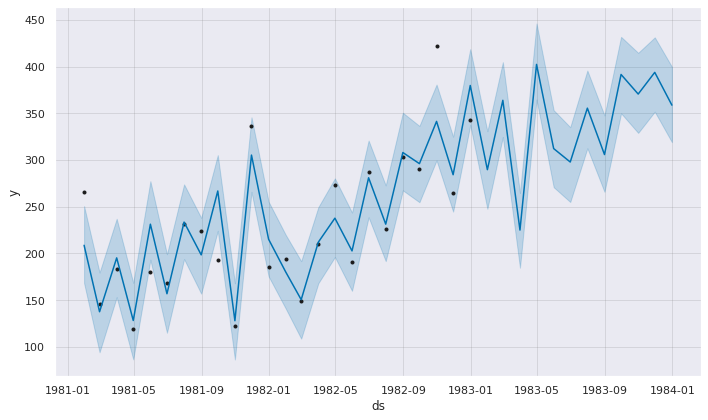

In [0]:
figure = m.plot(forecast)

In [0]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1981-01-31,167.046946,168.273689,250.679427,167.046946,167.046946,41.710430,41.710430,41.710430,41.710430,41.710430,41.710430,0.0,0.0,0.0,208.757376
1,1981-02-28,172.311610,94.318187,179.644637,172.311610,172.311610,-34.651425,-34.651425,-34.651425,-34.651425,-34.651425,-34.651425,0.0,0.0,0.0,137.660185
2,1981-03-31,178.140344,153.259040,237.117295,178.140344,178.140344,17.147723,17.147723,17.147723,17.147723,17.147723,17.147723,0.0,0.0,0.0,195.288067
3,1981-04-30,183.781055,86.716183,168.647925,183.781055,183.781055,-55.493167,-55.493167,-55.493167,-55.493167,-55.493167,-55.493167,0.0,0.0,0.0,128.287889
4,1981-05-31,189.609790,193.377675,277.329430,189.609790,189.609790,41.710430,41.710430,41.710430,41.710430,41.710430,41.710430,0.0,0.0,0.0,231.320220


Trend and Seasonality

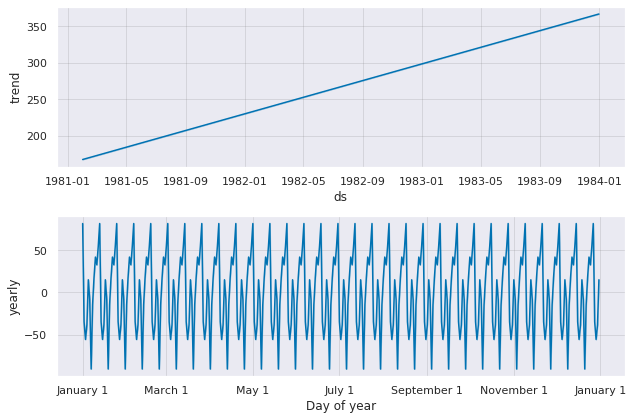

In [0]:
fig_decompose = m.plot_components(forecast)

The seasonality looks over-fitting

## ORDER 1


In [0]:
m2 = Prophet(weekly_seasonality=False, daily_seasonality=False, n_changepoints=2)
m2.add_seasonality(name='yearly', period=12, fourier_order=1)

m2.fit(train)
future2 = m2.make_future_dataframe(periods=12, freq='m')
forecast2 = m2.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Found custom seasonality named "yearly", disabling built-in yearly seasonality.


,ds,yhat,yhat_lower,yhat_upper
31,1983-08-31,327.794146,272.321399,382.370681
32,1983-09-30,421.522374,364.864524,481.352220
33,1983-10-31,332.180064,274.949111,386.880748
34,1983-11-30,446.480341,386.992420,506.649030
35,1983-12-31,350.912594,293.144678,406.762131


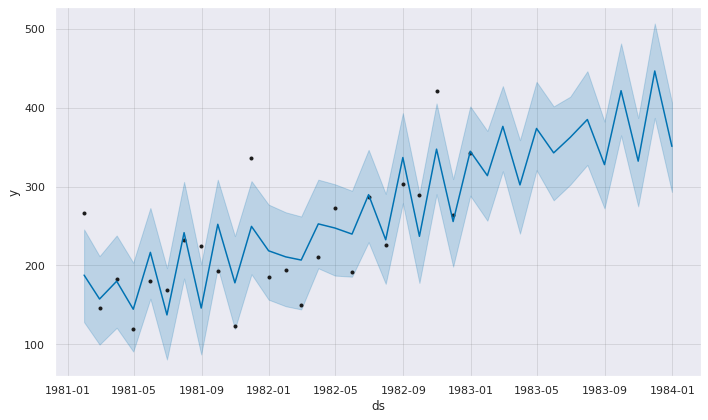

In [0]:
fig2 = m2.plot(forecast2)

Trend and Seasonality

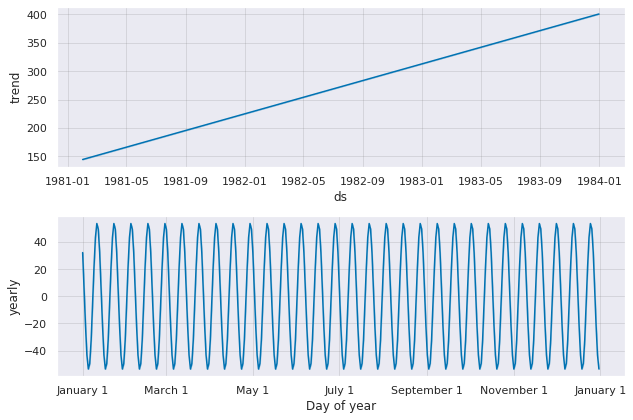

In [0]:
fig2_decompose = m2.plot_components(forecast2)

## Performance Metrics order 5

Create a cutoff column so Prophet knows when to compare predicted values to actual values.

In [0]:
forecast['cutoff'] = pd.to_datetime('1980-12-31')
forecast['y'] = df['y']
forecast.shape

(36, 18)

In [0]:
df_p = performance_metrics(forecast)
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
0,90 days,1164.387172,34.123118,25.890169,0.112746,0.666667
1,120 days,99.075226,9.953654,9.805257,0.066126,1.000000
2,151 days,944.131319,30.726720,24.065392,0.141626,0.666667
3,181 days,939.391660,30.649497,23.866064,0.142365,0.666667
4,212 days,913.518707,30.224472,21.462955,0.119810,0.666667


## Performance Metrics order 1

Create a cutoff column so Prophet knows when to compare predicted values to actual values.

In [0]:
forecast2['cutoff'] = pd.to_datetime('1980-12-31')
forecast2['y'] = df['y']
forecast2.shape

(36, 18)

In [0]:
df_p2 = performance_metrics(forecast2)
df_p2.head()

,horizon,mse,rmse,mae,mape,coverage
0,90 days,2089.362123,45.709541,30.952021,0.129994,0.666667
1,120 days,259.221376,16.100353,13.264475,0.102337,1.000000
2,151 days,653.990815,25.573244,21.517475,0.143082,1.000000
3,181 days,975.377621,31.231036,30.900262,0.199247,1.000000
4,212 days,795.345551,28.201871,25.750334,0.142852,1.000000


## Compare error terms from the two predictions

In [0]:
df_p.index = df_p['horizon']
df_p2.index = df_p2['horizon']

In [42]:
df_error_compare = df_p - df_p2
df_error_compare = df_error_compare.drop(columns=['horizon', 'coverage'])
df_error_compare.loc[:'365 days']

,mse,rmse,mae,mape
horizon,,,,
90 days,-924.974951,-11.586423,-5.061852,-0.017248
120 days,-160.146150,-6.146699,-3.459218,-0.036211
151 days,290.140503,5.153476,2.547917,-0.001456
181 days,-35.985962,-0.581539,-7.034199,-0.056882
212 days,118.173156,2.022601,-4.287379,-0.023042
243 days,-2140.159996,-32.644723,-26.706143,-0.128262
273 days,-1206.946301,-11.782897,-15.271429,-0.064064
304 days,-2178.702874,-19.711346,-29.263064,-0.188072
334 days,-2545.916713,-22.117102,-30.338831,-0.165308


In [43]:
df_error_compare = df_p2 - df_p
df_error_compare = df_error_compare.drop(columns=['horizon', 'coverage'])
df_error_compare.loc[:'365 days']

,mse,rmse,mae,mape
horizon,,,,
90 days,924.974951,11.586423,5.061852,0.017248
120 days,160.146150,6.146699,3.459218,0.036211
151 days,-290.140503,-5.153476,-2.547917,0.001456
181 days,35.985962,0.581539,7.034199,0.056882
212 days,-118.173156,-2.022601,4.287379,0.023042
243 days,2140.159996,32.644723,26.706143,0.128262
273 days,1206.946301,11.782897,15.271429,0.064064
304 days,2178.702874,19.711346,29.263064,0.188072
334 days,2545.916713,22.117102,30.338831,0.165308


The negative numbers means that the second model (Fourier term equal to 1) had larger error terms. So, in this case, the (Fourier term equal 5) model performed better.


## A persistence forecast
* A prediction (training data) of the final sales term would continue each month going forward.
* Second Prophet model forecast compared to a persistence forecast
* repeat cutoff date and yhat value


In [50]:
forecast_persist = forecast2.copy()
forecast_persist['cutoff'] = pd.to_datetime('1980-12-31')
forecast_persist['y'] = df['y']
forecast_persist['yhat'] = df.at[23,'y']
forecast_persist.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,cutoff,y
31,1983-08-31,371.050405,272.321399,382.370681,371.050404,371.050406,-43.256259,-43.256259,-43.256259,-43.256259,-43.256259,-43.256259,0.0,0.0,0.0,342.3,1980-12-31,407.6
32,1983-09-30,378.266115,364.864524,481.352220,378.266113,378.266116,43.256259,43.256259,43.256259,43.256259,43.256259,43.256259,0.0,0.0,0.0,342.3,1980-12-31,682.0
33,1983-10-31,385.722348,274.949111,386.880748,385.722346,385.722349,-53.542284,-53.542284,-53.542284,-53.542284,-53.542284,-53.542284,0.0,0.0,0.0,342.3,1980-12-31,475.3
34,1983-11-30,392.938057,386.992420,506.649030,392.938055,392.938059,53.542284,53.542284,53.542284,53.542284,53.542284,53.542284,0.0,0.0,0.0,342.3,1980-12-31,581.3
35,1983-12-31,400.394290,293.144678,406.762131,400.394288,400.394292,-49.481696,-49.481696,-49.481696,-49.481696,-49.481696,-49.481696,0.0,0.0,0.0,342.3,1980-12-31,646.9


In [0]:
df_persist = performance_metrics(forecast_persist)
df_persist.head()

,horizon,mse,rmse,mae,mape,coverage
0,90 days,23246.430000,152.467800,143.966667,0.834147,0.666667
1,120 days,37882.200000,194.633502,192.866667,1.361612,1.000000
2,151 days,33772.546667,183.773085,181.400000,1.212403,1.000000
3,181 days,35393.146667,188.130664,186.266667,1.266398,1.000000
4,212 days,22886.896667,151.284159,148.766667,0.802220,1.000000


In [0]:
df_persist.index = df_persist['horizon']

df_error_compare_persist = df_persist - df_p2
df_error_compare_persist = df_error_compare_persist.drop(columns=['horizon', 'coverage'])
df_error_compare_persist.loc[:'365 days']

,mse,rmse,mae,mape
horizon,,,,
90 days,21157.067877,106.758259,113.014646,0.704153
120 days,37622.978624,178.533148,179.602191,1.259274
151 days,33118.555851,158.199841,159.882525,1.069322
181 days,34417.769045,156.899628,155.366405,1.067150
212 days,22091.551116,123.082287,123.016333,0.659368
243 days,16353.510287,87.881680,94.210556,0.485302
273 days,12884.516402,69.958572,76.722235,0.359040
304 days,23880.422141,102.572748,97.914448,0.659847
334 days,18798.877471,84.705173,57.758407,0.521097


Those numbers are all positive, meaning that the error terms were larger for the persistence model than for the Prophet model